# Intro to Machine Learning
https://www.kaggle.com/code/dansbecker/how-models-work

**How manchine learning works:** identifying patterns from the past, and use those patterns with a model to make predictions for the future

# Decision Trees
-----

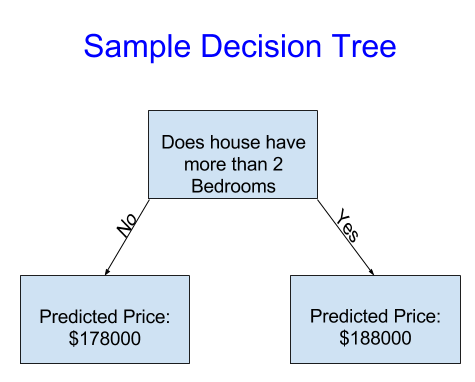

In [2]:
from IPython.display import Image
Image(filename='Attachments/simple_decision_tree.png')  

- Above we have a decision tree predicting house prices.
- It divides houses into two categories. The predicted price is the historical average price of houses in the same category
- We use data to decide how to break the houses into two groups: 2 bedrooms?
- and then we use further data to predict the prices: averages

>**Fitting or Training** the model: The step to capture patterns using data
>> The data used to **fit** the model is called the **training data**   
After the model has been **fit**, you can apply it to new data to **predict** prices of additional homes.

## Improving the Decision Tree


The shortcoming of the above model is that it does not capture other characteristics affecting home prices like the number of bathrooms, lot size, location, etc.
> **"Deeper Trees":** A tree that captures more characteristics by using more **"splits"**

For example:

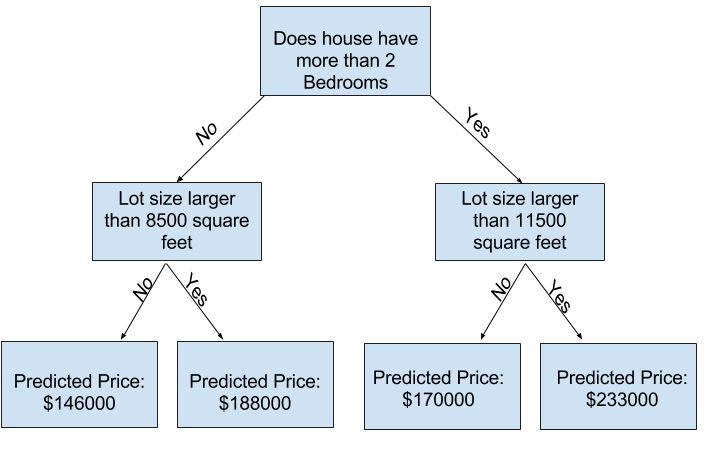

In [4]:
Image(filename='Attachments/simple_deeper_decision_tree.png')

We make a prediction by tracing through the decision tree.
> **Leaf:** The point at the bottom of the tree where the prediction is made


## Get Familiar with Data Using Pandas

In [29]:
import pandas as pd
melb_data = pd.read_csv(r'Attachments/melb_data.csv')
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [12]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


A familier issue in ML is when data is out of date, this needs to be checked and taken into account before predictions are made.

## Selecting Data for Modeling
We need to filter the df for relevant data. Later we will look at statsitical models for this.

In [22]:
# get columns and then pick which are needed
melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [23]:
# drop rows with any missing value
melbourne_data = melb_data.dropna(axis=0, how='any')

> **Prediction Target:** Column we want to predict (e.g. Price of house)

By convention, the prediction target is called **y**
<br> We select this column using **dot-notation**, where the single column is stored as a **series**.

In [24]:
y = melbourne_data.Price

> **Features:** The columns that are inputted into our model, and later used to make predictions.

In our case, the columns used to determine the house price.   
We select feature columns using a **list** of column names.  
By convention, the features list is called **x**

In [27]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
x = melbourne_data[features]
x.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [28]:
x.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


## Building a Model
> **scikit-learn:** most popular library for modeling data in dataframes

### DecisionTrees in scikit-learn Model
> **Regression:** Predicts continuous numerical values  
> **Classification:** Predicts categorical outcomes

We will use the Regression model.
Below, we **initialise** a regression decision tree object: 

In [30]:
from sklearn.tree import DecisionTreeRegressor

# Using random_state (can use any value) is best practice. It ensures the result of our prediction does not change for each run.
melbourne_model = DecisionTreeRegressor(random_state=1)

Now we call .fit()

In [31]:
melbourne_model.fit(x,y)

DecisionTreeRegressor(random_state=1)

This is when the actual learning happens:

The model:

1. Looks at your features x and target values y.

2. Recursively finds the best features and values to split the data to minimize MSE (Mean Squared Error).

3. Builds the decision tree according to the rules and depth you've defined. (depth is how many levels to the tree there are)

4. Stores the tree structure in memory.

### Minimising MSE:

At each node, the tree:

1. **Tries each feature**
2. **Tries split values** (e.g. `Size < 80`)
3. **Calculates MSE** for each split:
<center>
   $
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\text{actual}_{i} - \text{predicted}_{i})^2
   $
</center>
4. **Chooses the split** with the **lowest total MSE**
5. **Repeats recursively** on resulting subgroups

---

### 📊 Example

Data:

| Size | Price |
|------|-------|
| 50   | 150   |
| 60   | 180   |
| 90   | 290   |
| 110  | 330   |

Try `Size < 80`:

- Left: 50, 60 → avg = 165 → MSE = ((150−165)² + (180−165)²)/2 = 225 
- Right: 90, 110 → avg = 310 → MSE = ((290−310)² + (330−310)²)/2 = 400 
- **Total MSE** of split = (2/4)225 + (2/4)400 = **312.5**   
(2/4 is a weighting for how many values are to the left or right of the split. There are 4 values in Size and 2 values either side of the split)

Tree picks the split with **lowest total MSE**, and continues recursively.

In [36]:
print("Making predictions for the following 5 houses:")
print(x.head())
print("The predictions are")
print(melbourne_model.predict(x.head())) # the parameter inside predict is the test data for the features

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]
